# Introduction

Greetings! I'm Gurpreet Singh, an AI engineer passionate about leveraging cutting-edge technologies to solve complex problems. With a strong background in artificial intelligence, machine learning, and data science, I thrive on exploring innovative solutions that push the boundaries of what's possible.

* Developing predictive models for financial forecasting.
* Implementing computer vision solutions for object detection and classification.
* Building conversational AI systems for customer support and virtual assistants.
* Contributing to research and development initiatives aimed at advancing the field of artificial intelligence.

## LinkedIn: https://www.linkedin.com/in/gurpereet-singh-9836781a5,
## Github: https://github.com/gurpreetsingh1111/Iris-Data-Classification-Project,
## Twitter: https://twitter.com/Gurpree95408151

In [2]:
import os 
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("/kaggle/input/iris-flower-dataset/IRIS.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
iris_df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(iris_df.head())

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(iris_df.describe())

# Display the distribution of the target variable
print("\nDistribution of the species variable:")
print(iris_df['species'].value_counts())

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Summary statistics of the dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6

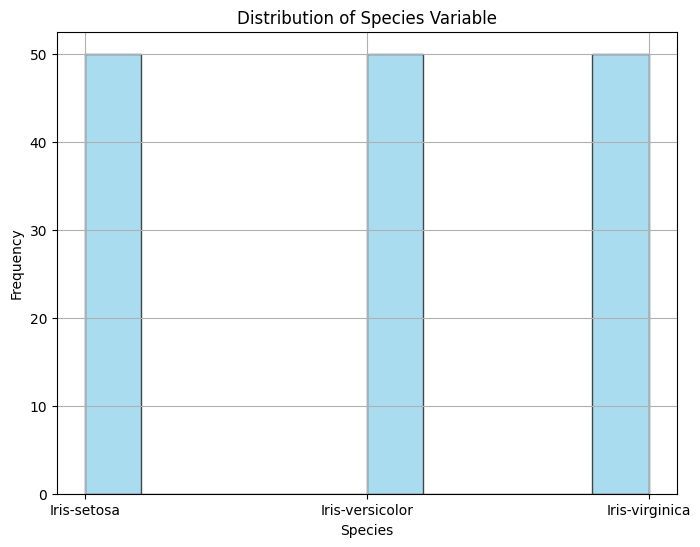

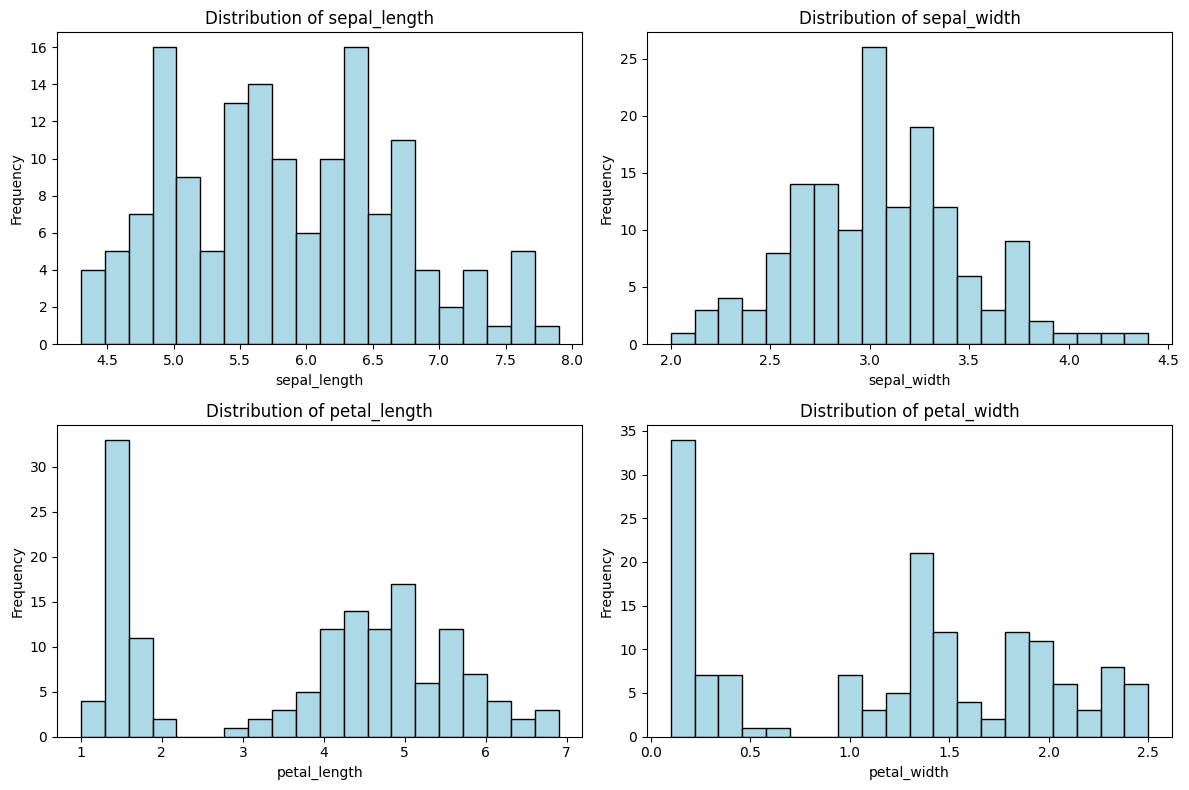

In [11]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
plt.hist(iris_df['species'], alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Distribution of Species Variable')
plt.grid(True)
plt.show()

# Visualize the distributions of the features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris_df.columns[:-1]): # Exclude the target column
    plt.subplot(2, 2, i + 1)
    plt.hist(iris_df[feature], bins=20, color='lightblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

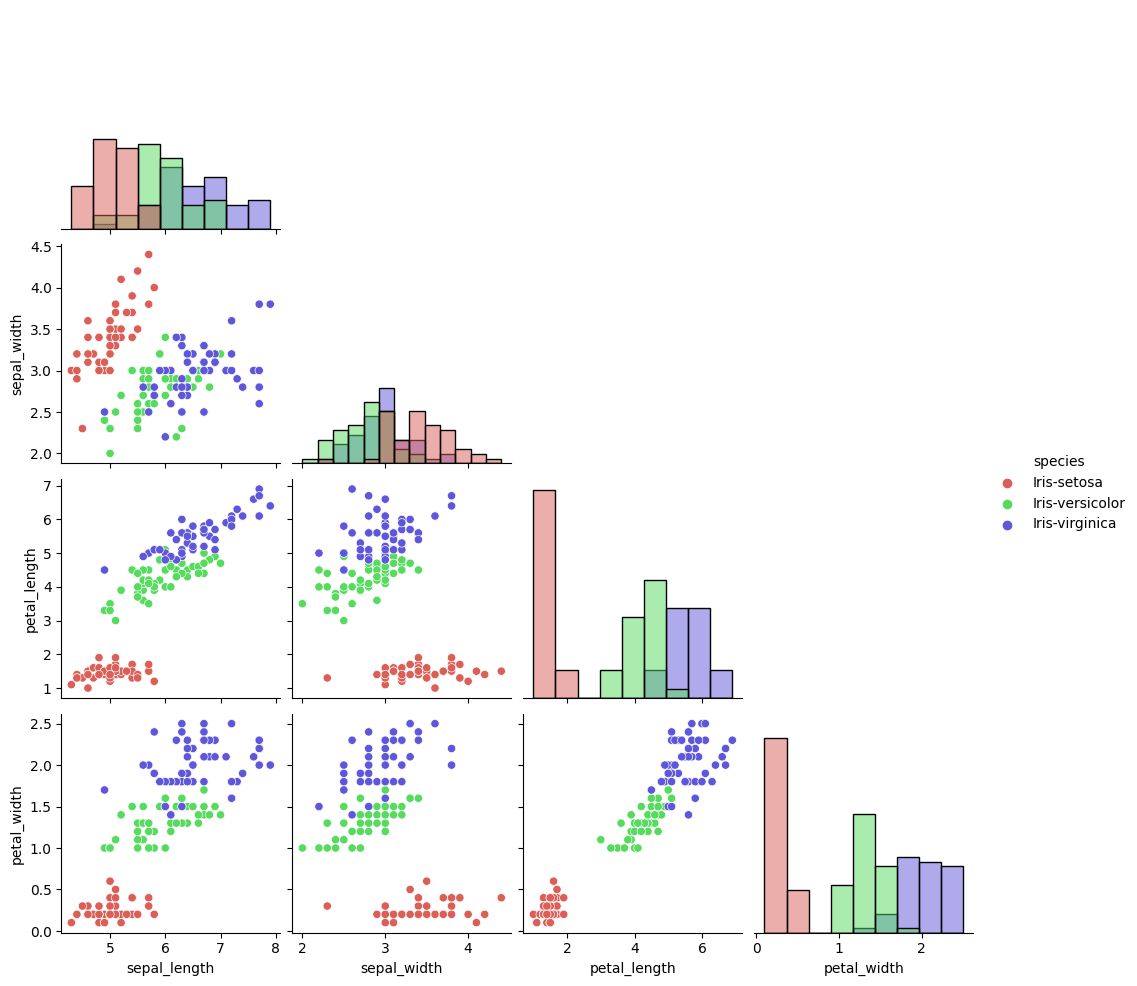

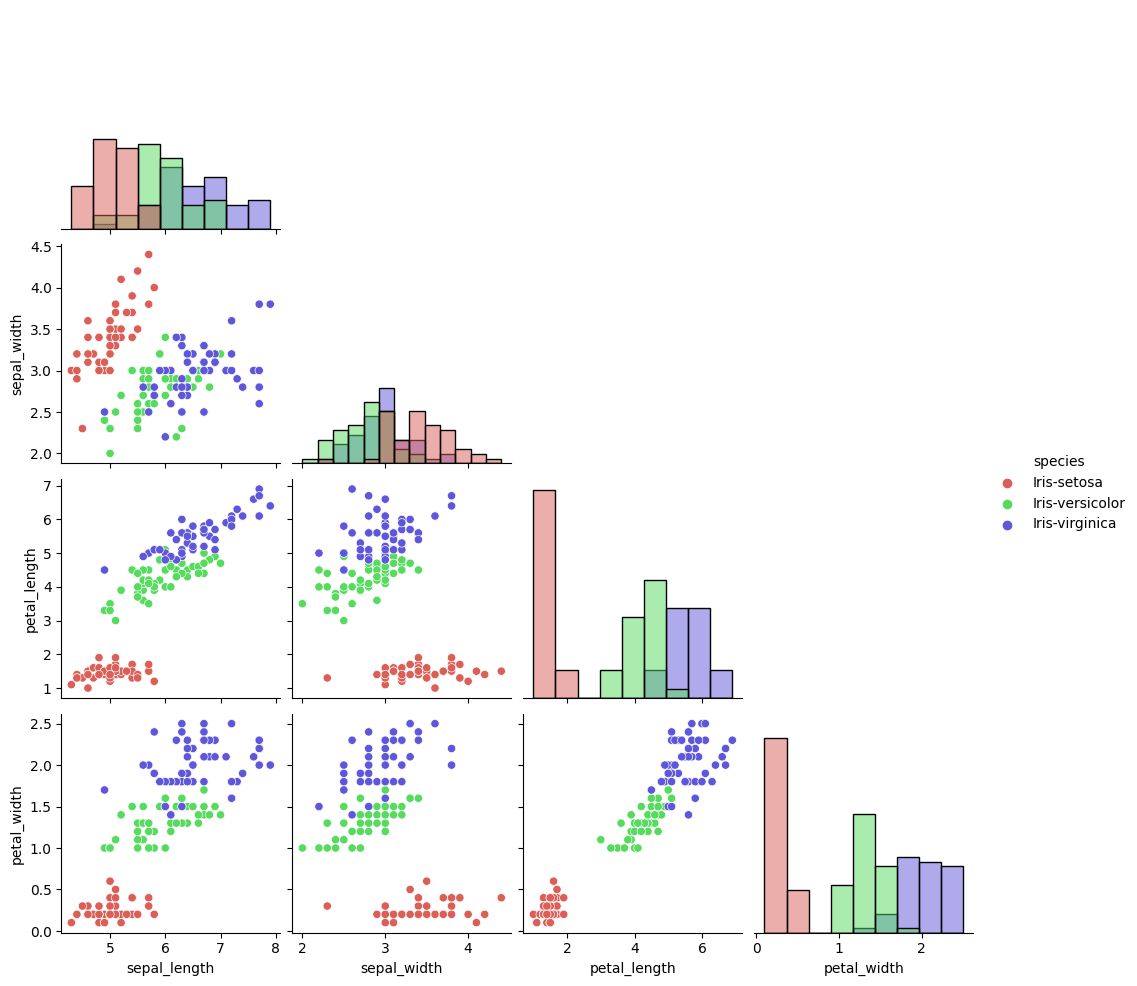

In [13]:
import seaborn as sns
import warnings
# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your code goes here

# Suppress FutureWarnings temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    sns.pairplot(iris_df, hue='species', diag_kind="hist", corner=True, palette='hls')

sns.pairplot(iris_df , hue='species' , diag_kind="hist" , corner=True , palette = 'hls');

# Data Visualizaiton

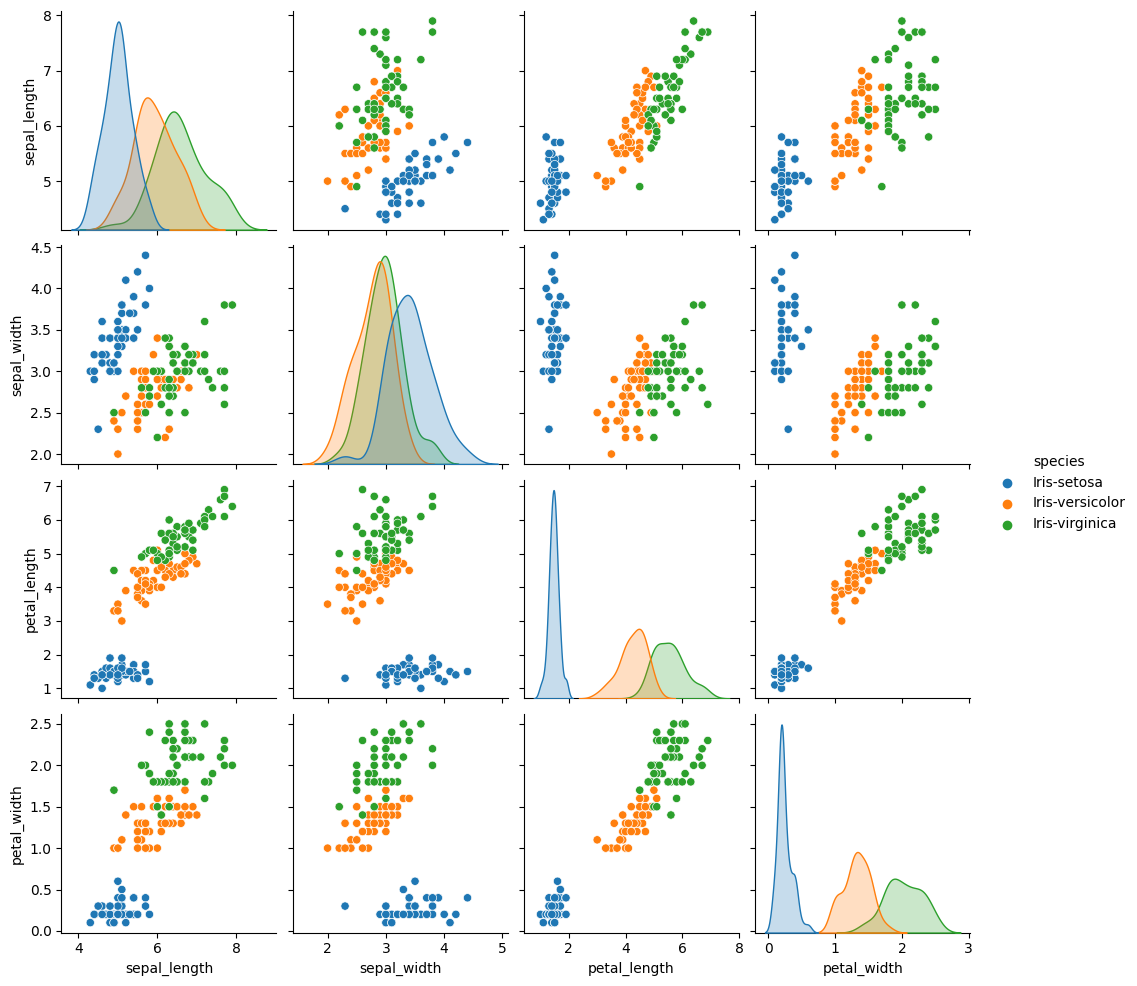

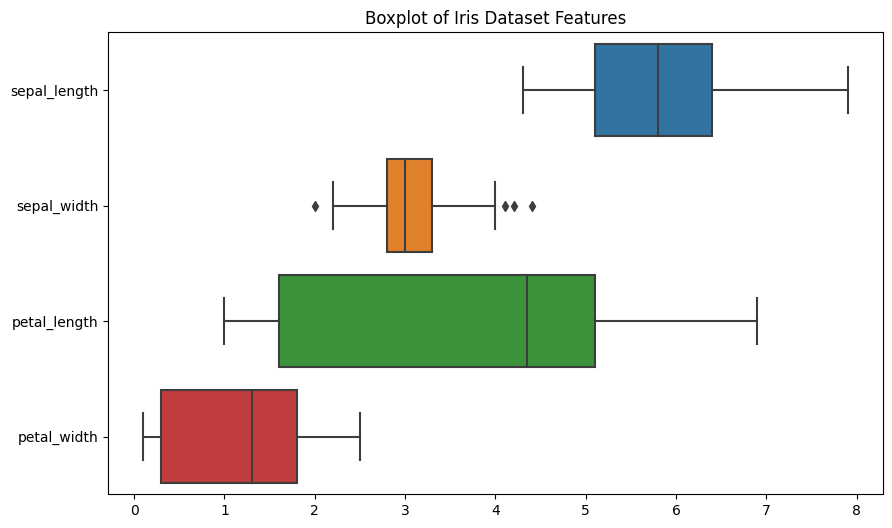

In [16]:
# Visualize pairplot
sns.pairplot(iris_df, hue='species')
plt.show()

# Visualize boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, orient='h')
plt.title('Boxplot of Iris Dataset Features')
plt.show()



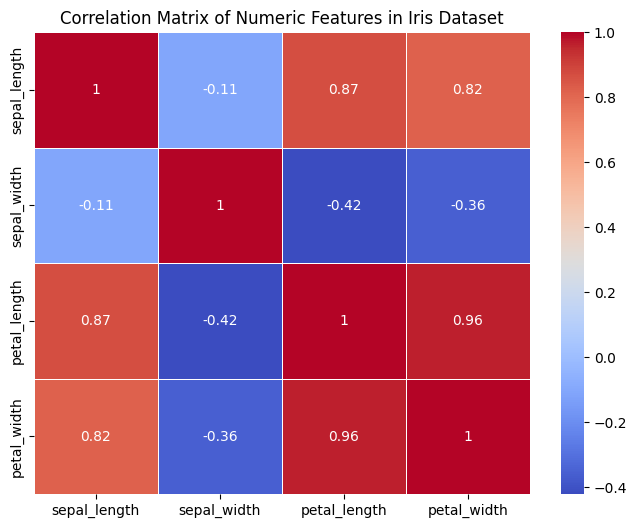

In [19]:
# Exclude the 'species' column before calculating the correlation matrix
numeric_cols = iris_df.drop('species', axis=1)

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features in Iris Dataset')
plt.show()


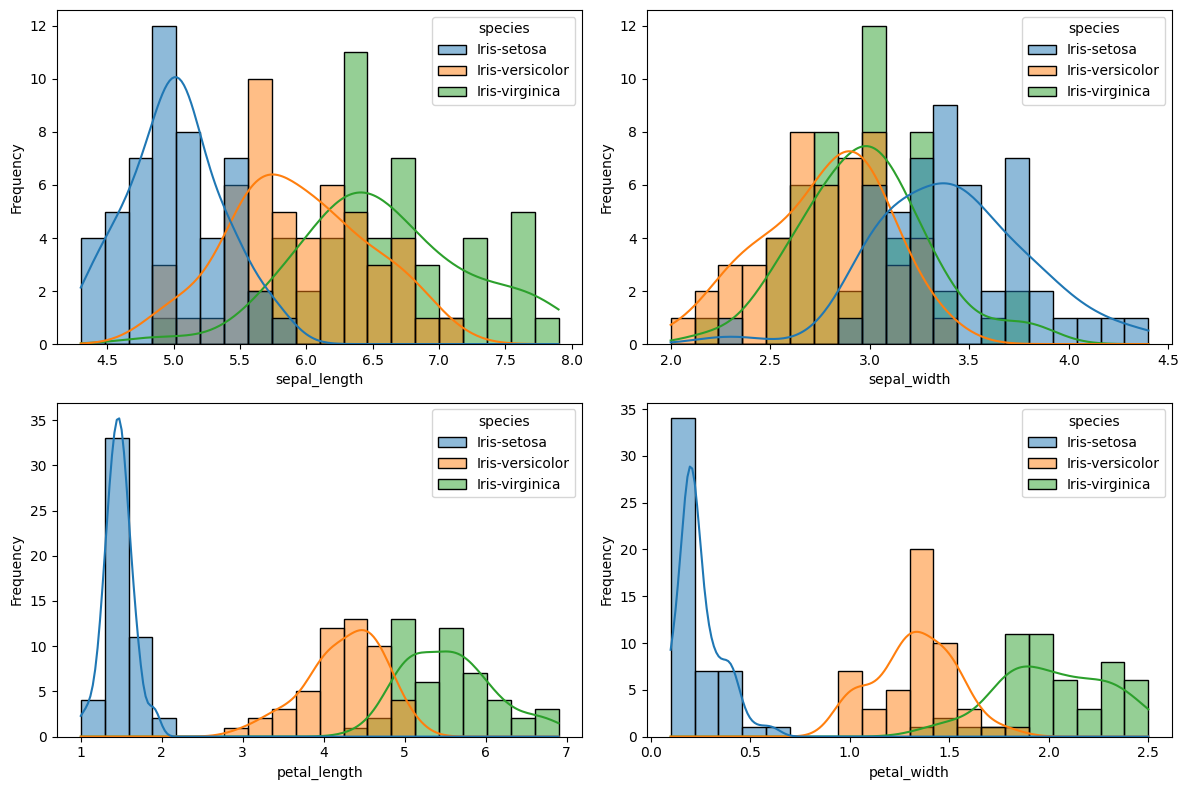

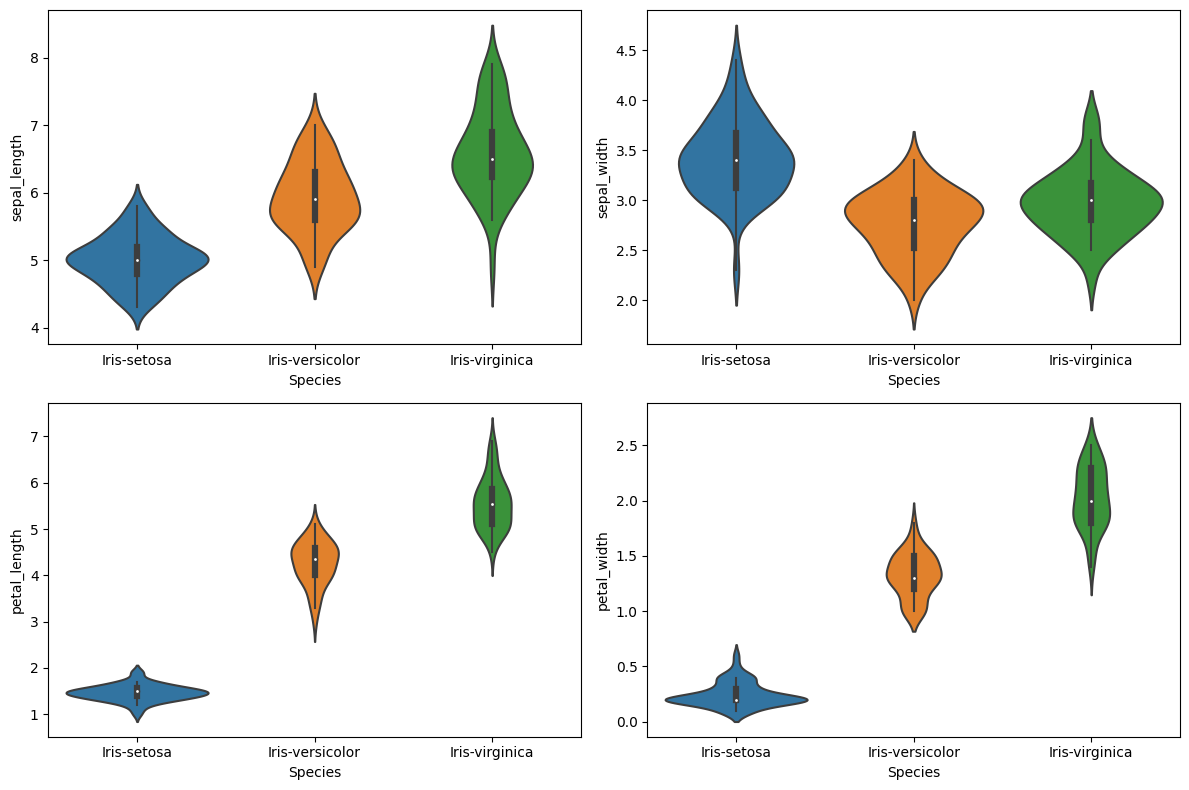

In [20]:
# Visualize distribution plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=iris_df, x=feature, hue='species', kde=True, bins=20)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualize violin plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(data=iris_df, x='species', y=feature)
    plt.xlabel('Species')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Processing the datasets:

In [21]:
# Split the dataset into features (X) and target variable (y)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of testing set:", X_test.shape, y_test.shape)


Shape of training set: (120, 4) (120,)
Shape of testing set: (30, 4) (30,)


# Selectin of ML Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression model:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of Logistic Regression model: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Instantiate models
logistic_model = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()

# List of models
models = [logistic_model, tree_model, forest_model, svm_model, knn_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'k-NN']

# Train and evaluate each model
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy}")

# Find the best model based on accuracy
best_model_idx = np.argmax([accuracy_score(y_test, model.predict(X_test)) for model in models])
best_model_name = model_names[best_model_idx]
print(f"\nThe best model based on accuracy is: {best_model_name}")


Accuracy of Logistic Regression: 1.0
Accuracy of Decision Tree: 1.0
Accuracy of Random Forest: 1.0
Accuracy of SVM: 1.0
Accuracy of k-NN: 1.0

The best model based on accuracy is: Logistic Regression


In [24]:
# Instantiate all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Find the best model based on accuracy
best_model = max(results, key=results.get)
best_accuracy = results[best_model]

print("Model Comparisons:")
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.4f}")

print("\nThe best model based on accuracy is:", best_model, "with accuracy =", best_accuracy)

Model Comparisons:
Logistic Regression: Accuracy = 1.0000
Decision Tree: Accuracy = 1.0000
Random Forest: Accuracy = 1.0000
SVM: Accuracy = 1.0000
k-NN: Accuracy = 1.0000

The best model based on accuracy is: Logistic Regression with accuracy = 1.0


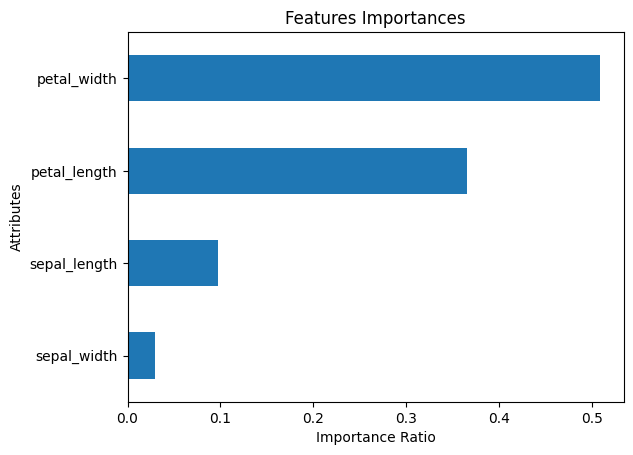

In [25]:
features = X_train.columns
# Extract importances from model
importances = forest_model.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail().plot(kind='barh')
plt.xlabel('Importance Ratio')
plt.ylabel('Attributes')
plt.title('Features Importances');

# Visualize results:

Predicted Classes:
Iris data: [5.1 3.5 1.4 0.2] -> Predicted Class: setosa
Iris data: [6.2 2.8 4.8 1.8] -> Predicted Class: virginica
Iris data: [7.3 3.1 6.3 2.3] -> Predicted Class: virginica


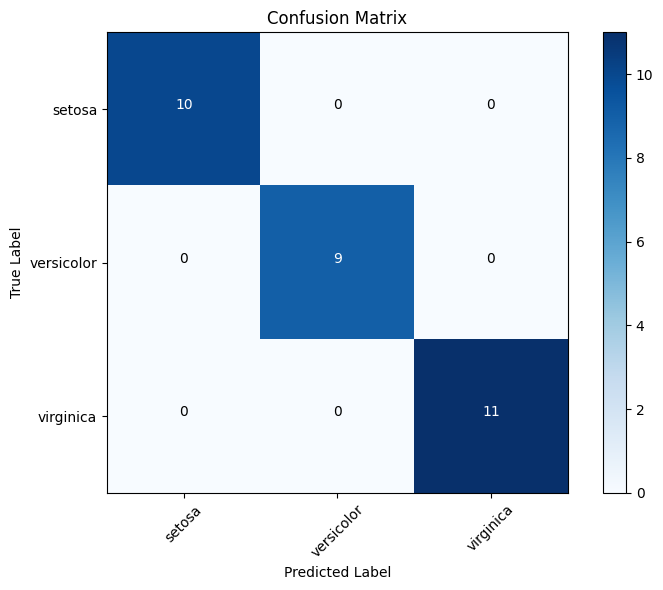

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppress the warning
warnings.filterwarnings("ignore", category=UserWarning)

# Assuming you have defined X_train, X_test, y_train, y_test, and iris_target_names previously

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.transform(y_test)

# Instantiate and train the selected model (e.g., Logistic Regression)
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train_numeric)

# Make predictions on new data
new_data = np.array([[5.1, 3.5, 1.4, 0.2],  # Sample Iris data for prediction
                      [6.2, 2.8, 4.8, 1.8],
                      [7.3, 3.1, 6.3, 2.3]])

predicted_classes = model.predict(new_data)

# Define iris target names
iris_target_names = ['setosa', 'versicolor', 'virginica']

print("Predicted Classes:")
for data, prediction in zip(new_data, predicted_classes):
    print(f"Iris data: {data} -> Predicted Class: {iris_target_names[prediction]}")

# Visualize the confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test_numeric, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(iris_target_names))
plt.xticks(tick_marks, iris_target_names, rotation=45)
plt.yticks(tick_marks, iris_target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(iris_target_names)):
    for j in range(len(iris_target_names)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()
